# Homework 1
### by Arman Tsaturyan (DS)

## 1 Optimization problem example – 1 point

Find the dimensions (height h and radius r) that will minimize the surface area of the metal to manufacture a circular cylindrical can of volume V .

### Solution

\begin{array}{l}
{V=\pi r^{2} h=>h=\frac{V}{\pi r^{2}}} \\
{S=2 \pi r h+2 \pi r^{2}=2 \pi r(h+r)} \\
{S=2 \pi r\left(r+\frac{V}{\pi r^{2}}\right)=2 \pi r^{2}+\frac{2 V}{r}} \\
{S'=4 \pi r-\frac{2 V}{r^{2}}=0} \\
{2 \pi r-\frac{V}{r^{2}}=0} \\
{2 \pi r^{3}-V=0} \\
{r^{3}=\frac{V}{2 \pi}=> r=\sqrt[3]{\frac{V}{2 \pi}}} \\
{h=\frac{V}{\pi\left(\frac{V}{2 \pi}\right)^{2 / 3}}=\frac{V}{\pi^{1 / 3}\left(\frac{V}{2}\right)^{2 / 3}}}  
\end{array}

## 2 Optimally conditions – 3 points
Consider the unconstrained optimization problem to minimize the function,
\begin{aligned}
&f\left(x_{1}, x_{2}\right)=\frac{3}{2}\left(x_{1}^{2}+x_{2}^{2}\right)+(1+a) x_{1} x_{2}-\left(x_{1}+x_{2}\right)+b\\
&a, b \in \mathbb{R}
\end{aligned}
over $\mathbb{R}^{2}$, where a and b are real-valued parameters. Find all values of a and b such that the problem has a unique optimal solution.

### Solution

* Necessity:
\begin{array}{l}
{\frac{\partial f}{\partial x_{1}}=\frac{3}{2} \cdot 2 x_{1}+(1+a) x_{2}-1=0} \\
{\frac{\partial f}{\partial x_{2}}=\frac{3}{2} \cdot 2 x_{2}+(1+a) x_{1}-1=0}
\end{array}

Doing elementary transformations with matrix of system:
\begin{equation}
\left(\begin{array}{cc|c}
{3} & {1+a} & {1} \\
{1+a} & {3} & {1}
\end{array}\right)
\sim
\end{equation}

\begin{equation}
\sim
\left(\begin{array}{cc|c}
{1} & {1+a} & {1 / 3} \\
{1+a} & {3} & {1}
\end{array}\right)
\sim
\end{equation}

\begin{equation}
\sim
\left(\begin{array}{cc|c}{1} & {\frac{1+a}{3}} & {1 / 3} \\
{0} & {3-\frac{(1+a)^2}{3}} & {1-\frac{1+a}{3}}
\end{array}\right)
\sim
\end{equation}

\begin{equation}
\sim
\left(\begin{array}{cc|c}
{1} & {0} & {\frac{1}{3}-\frac{(1 / 3(-a-1)+1)(a+1)}{9-(a+1)^{2}}} \\
{0} & {3-\frac{(1+a)^{2}}{3}} & {1-\frac{1+a}{3}}
\end{array}\right)
\end{equation}

So, we get for $x_{1}$ and $x_{2}$:
\begin{equation}
\begin{aligned}
&x_{1}=\frac{1}{3}-\frac{(1 / 3(-a-1)+1)(a+1)}{9-(a+1)^{2}}\\
&x_{2}=\frac{\frac{1}{3}(-a-1)+1}{3-\frac{1}{3}(a+1)^{2}}
\end{aligned}
\end{equation}

We can see from denominator that if $a=2$ and $a=-4$ solution does not exist

* Sufficiency:
\begin{equation}
\begin{aligned}
&\frac{\partial^{2} f}{\partial x_{1}^{2}}=3 \quad \frac{\partial^2 f}{\partial x_{2}^{2}} = 3\\
&\frac{\partial^{2} f}{\partial x_{1} x_{2}}=1+a
\end{aligned}
\end{equation}

Using Sylvester's criterion:
\begin{equation}
\left|\begin{array}{cc}
{3} & {1+a} \\
{1+a} & {3}
\end{array}\right|
\end{equation}

\begin{equation}
\begin{aligned}
&\Delta_{1}=3>0\\
&\Delta_{2}=g-(1+a)^{2}
\end{aligned}
\end{equation}

\begin{equation}
\Delta_{2}>0 \text { if } a \in(-4,2)
\end{equation}

So, optimal solution is unique if $a \in(-4,2)$ and $\forall b$, because the addition of constant does not affect the extremum.

## 3 Nelder Mead method – 8 points
Implement Nelder-Mead method for the Mishra's Bird function
$$
f(x, y)=\sin (y) e^{(1-\cos (x))^{2}}+\cos (x) e^{(1-\sin (y))^{2}}+(x-y)^{2}
$$
subjected to, $(x+5)^{2}+(y+5)^{2}<25$
1. To illustrate the behavior of the methods plot simplex (triangle) for every iteration. Provide the link to code repository.
2. Demonstrate that the algorithm may converge to different points depending on the starting point. Report explicitly two distinct starting points $x^{0}$ and the corresponding $x^{*}$
3. Examine the behavior of the method for various parameters $\alpha, \beta$ and $\gamma .$ For one chosen $x^{0}$ show that the method may converge to different points. Report parameter values and $x^{*}$

### Solution

In [1]:
import numpy as np

In [395]:
class NelderMeadOpt:

    def __init__(self, alpha=1, gamma=1.5, beta=0.5):
        self.alpha = alpha
        self.gamma = gamma
        self.beta = beta

    def optimize(self, dim, fn, e = 10**-8, max_iter=200):
        
        history_points=[]
        minims = []
        #points = np.random.rand(dim,dim-1) # if you want random points again use this!!!!!
        points = np.array([[-3, -4], [-3, -4],[-3, -4]])
        print("Starting points",points)
        
        iter_count = 0
        while iter_count < max_iter:
            history_points.append(points)
            
            iter_count+=1
            
            results = []
            for p in points:
                p = list(p)
                results.append(fn(*p))
            results = np.array(results)
            indexes = results.argsort()
            results.sort()
            points = points[indexes]
            minims.append(results[0])
            centroid = np.mean(points[:-1],axis=0)
            xr = centroid + self.alpha * (centroid - points[-1])
            score_r = fn(*list(xr))
            if results[0] < score_r <results[-1]:
                points[-1] = xr
                continue
            if score_r < results[0]:
                xe = centroid + self.gamma * (-points[-1] - centroid)
                score_e = fn(*list(xe))
                if score_r > score_e :

                    points[-1] = xe
                    continue
                else:
                    points[-1] = xr
                    continue
            xc = centroid + self.beta * (points[-1] - centroid)
            score_c = fn(*list(xc))
            if score_c < results[-1]:

                points[-1] = xc
                continue

        
        return (history_points,results,minims)

In [266]:
# visualize class
# visualizer source: https://github.com/Williangalvani/nelderMeadVisualizer
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.animation as animation
import matplotlib.colors as colors
import matplotlib.cm as cmx

class PlotFunctionAndTriangle:

    def __init__(self, function, datapoints, animated=True):

        self.dataPoints = datapoints
        dx, dy = 0.05, 0.05

        # generate 2 2d grids for the x & y bounds
        y, x = np.mgrid[slice(datapoints[-1][-1][1]-1, datapoints[-1][-1][1]+1 + dy, dy),
                        slice(datapoints[-1][-1][0]-1, datapoints[-1][-1][0]+1 + dx, dx)]

        z = function(x, y)

        # x and y are bounds, so z should be the value *inside* those bounds.
        # Therefore, remove the last value from the z array.
        z = z[:-1, :-1]
        levels = MaxNLocator(nbins=10).tick_values(z.min(), z.max())

        # pick the desired colormap, sensible levels, and define a normalization
        # instance which takes data values and translates those into levels.
        cmap = plt.get_cmap('gray')
        norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

        self.fig, ax1 = plt.subplots(nrows=1)

        # contours are *point* based plots, so convert our bound into point
        # centers
        cf = ax1.contour(x[:-1, :-1] + dx / 2.,
                          y[:-1, :-1] + dy / 2., z, levels=levels,
                          cmap=cmap)
        plt.clabel(cf, inline=1, fontsize=10, fmt="%1.1f")
        #self.fig.colorbar(cf, ax=ax1)
        ax1.set_title('Nelder-Mead on a parabolic function')


        # adjust spacing between subplots so `ax1` title and `ax0` tick labels
        # don't overlap
        self.fig.tight_layout()

        if animated:
            initial = [[0, 1, 2], [0, 1, 2]]
            self.line, = ax1.plot(*initial)

            ani = animation.FuncAnimation(self.fig, self.animate, len(self.dataPoints),
                                          interval=300, blit=True)
            ani.save('animation.gif', writer='imagemagick', fps=3)
        else:

            jet = plt.get_cmap('gray')
            cNorm = colors.Normalize(vmin=0, vmax=len(self.dataPoints))
            scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
            print(scalarMap.get_clim())

            for i, points in enumerate(self.dataPoints):
                colorVal = scalarMap.to_rgba(i)
                points = np.append(points, [points[0]], axis=0)
                print(points.transpose())
                #ax1.plot(*points.transpose(),color=colorVal)

    def animate(self, i):
        points = np.append(self.dataPoints[i], [self.dataPoints[i][0]], axis=0)
        self.line.set_data(points.transpose())  # update the data
        return self.line,

### Experiment #1

In [198]:
opt = NelderMeadOpt()

fn = lambda x,y: np.sin(y)*np.exp((1-np.cos(x))**2)+np.cos(x)*np.exp((1-np.sin(y))**2)+(x-y)**2
res = opt.optimize(3,fn)

Starting points [[0.48069917 0.35931452]
 [0.37431438 0.18978109]
 [0.27400781 0.72640185]]


In [204]:
print ('Minimum =',res[1][0],'\n'
       'At point:',res[0][-1][2])

Minimum = -106.7645367492647 
At point: [-3.1302468 -1.5821422]


In [242]:
PlotFunctionAndTriangle(fn, res[0])

### 1. To illustrate the behavior of the methods plot simplex (triangle) for every iteration. Provide the link to code repository.

### Here we can see the evolution of symplex: 


![SegmentLocal](animation1.gif "segment")

### 2. Demonstrate that the algorithm may converge to different points depending on the starting point. Report explicitly two distinct starting points $x^{0}$ and the corresponding $x^{*}$

* We can see that in $Experiment #1$ we start at points $$[[0.48069917, 0.35931452]\\
 [0.37431438, 0.18978109]\\
 [0.27400781, 0.72640185]]$$
 
 And find the minimum $$minimum(f) = -106.7645367492647$$ at point $$x^{*} = [[-3.1302468 -1.5821422]]$$
 
 
 
 * In $Experiment #2$ (next cells) we start at points $$[[0.24435634, 0.46077922]\\
 [0.62970977, 0.07163914]\\
 [0.90126604, 0.62832927]]$$
 
 And find the minimum $$minimum(f) = 1.4870191272148545$$ at point $$x^{*} = [[0.9055189,  0.66525564]]$$
 
 #### So, the  the algorithm congerges depanding on starting points.

### Experiment #2

In [218]:
opt = NelderMeadOpt()

fn = lambda x,y: np.sin(y)*np.exp((1-np.cos(x))**2)+np.cos(x)*np.exp((1-np.sin(y))**2)+(x-y)**2
res = opt.optimize(3,fn)

Starting points [[0.24435634 0.46077922]
 [0.62970977 0.07163914]
 [0.90126604 0.62832927]]


In [228]:
print ('Minimum =',res[1][2],'\n'
       'At point:',res[0][-1][2])

Minimum = 1.4870191272148545 
At point: [0.9055189  0.66525564]


In [241]:
PlotFunctionAndTriangle(fn, res[0])

![SegmentLocal](animation2.gif "segment")

### 3. Examine the behavior of the method for various parameters $\alpha, \beta$ and $\gamma .$ For one chosen $x^{0}$ show that the method may converge to different points. Report parameter values and $x^{*}$

* Lets fix the starting $x0$ from $Experiment #1$ and change the parameters $\alpha, \beta$ and $\gamma .$

#### Obtained Results: 
$$\alpha = 1, \beta = 1.5, \gamma = 0.5$$
$$Minimum = -106.76453674926466 \\
x^{*}= [-3.13024681, -1.58214218]$$

$$\alpha = 2, \beta = 1.5, \gamma = 0.5$$
$$Minimum = -6.1692286883022245\\
x^{*}= [-8.38943405, -6.76201125]$$

$$\alpha = 1, \beta = 1, \gamma = 0.5$$
$$Minimum = 1.4870191265420762 \\
x^{*}= [0.9055187,  0.66527763]$$

$$\alpha = 1, \beta = 1.5, \gamma = 1$$
$$Minimum = 2.021366362396238 \\
x^{*}= [0.37431438 0.18978109]$$


In [316]:
opt = NelderMeadOpt(alpha=1, gamma=1.5, beta=0.5)
res = opt.optimize(3,fn)

print ('Minimum =',res[1][2],'\n'
       'At point:',res[0][-1][2])

Starting points [[0.48069917 0.35931452]
 [0.37431438 0.18978109]
 [0.27400781 0.72640185]]
Minimum = -106.76453674926466 
At point: [-3.13024681 -1.58214218]


In [256]:
opt = NelderMeadOpt(alpha=2, gamma=1.5, beta=0.5)
res = opt.optimize(3,fn)

print ('Minimum =',res[1][2],'\n'
       'At point:',res[0][-1][2])

Starting points [[0.48069917 0.35931452]
 [0.37431438 0.18978109]
 [0.27400781 0.72640185]]
Minimum = -6.1692286883022245 
At point: [-8.38943405 -6.76201125]


In [265]:
opt = NelderMeadOpt(alpha=1, gamma=1, beta=0.5)
res = opt.optimize(3,fn)

print ('Minimum =',res[1][2],'\n'
       'At point:',res[0][-1][2])

Starting points [[0.48069917 0.35931452]
 [0.37431438 0.18978109]
 [0.27400781 0.72640185]]
Minimum = 1.4870191265420762 
At point: [0.9055187  0.66527763]


In [303]:
opt = NelderMeadOpt(alpha=1, gamma=1.5, beta=1)
res = opt.optimize(3,fn)

print ('Minimum =',res[1][2],'\n'
       'At point:',res[0][-1][2])

Starting points [[0.48069917 0.35931452]
 [0.37431438 0.18978109]
 [0.27400781 0.72640185]]
Minimum = 2.021366362396238 
At point: [0.37431438 0.18978109]


We can see that method converges to different minimum depending on the values pf alpha, beta, gamma.

## 4 Coordinate descend – 6 points
Implement coordinate descend for $x_0$ and f from Task 3. Compare the number of function evaluations (Oracle calls) for Nelder Mead algorithm and Coordinate descend. Report parameters of the algorithm. Provide the link to code repository. Make a conclusion.

### Solution

In [417]:
def coordinate_descend_step(x0, oracle, k, gamma = 0.01, alpha = 0.01):
    n = x0.size
    i = k % n
    h = np.zeros_like(x0)
    h[i] = 1
    x = x0 - gamma*(oracle(x0[0] + alpha*h[0],x0[1] + alpha*h[1]) - oracle(x0[0],x0[1]))/alpha*h
    return x, k+1, alpha/2

In [431]:
x0 = np.array([0.37431438, 0.18978109])
Function = []
Function.append(fn(x0[0],x0[1]))
x_next, k, alpha = coordinate_descend_step(x0, fn, 0)
Function.append(fn(x_next[0],x_next[1]))
while np.linalg.norm(x_next - x0) > 1e-3:
    x0 = x_next
    x_next, k, alpha = coordinate_descend_step(x0, fn, k, alpha)
    Function.append(fn(x_next[0],x_next[1]))

Text(0.5, 0, 'iter')

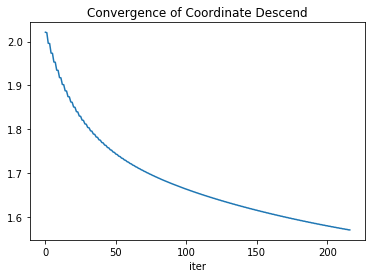

In [432]:
plt.plot(Function)
plt.title('Convergence of Coordinate Descend')
plt.xlabel('iter')

If the initial point is chosen well, than the number of oracle calls in Coordinate Descend is less than in Nelder Mead method, but coordinate descend often does not converge.

### We can see that Coordinate Descend got stuck in local minimum from initial point, which is an obvious con of this method compared with Nelder Mead method, which has at least three points in initial simplex which allows it to avoid local minimas better.